# Imports

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Utils

In [143]:
def show_matrix(matrix:np.ndarray,title:str=""):
    print(f"-------------{title}--------------\n")
    return print(f"{matrix}\n")

def plot_graph(array,title,x_lab,y_lab):
    plt.style.use("ggplot")
    plt.figure()
    plt.scatter([x for x in range(len(array))],array)
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.show()

# Dataset

In [144]:
Data = np.array([
    [1740, 920 , 1560, 2210, 990 , 1240],
    [1770, 820 , 1260, 2010, 1680, 2090],
    [2110, 1170, 1640, 1500, 550 , 430 ],   
    [1940, 1130, 1750, 1660, 770 , 1140],
    [1650, 890 , 1350, 2540, 2090, 3230],
    [2290, 1070, 1420, 1830, 1260, 2330],
    [820 , 1260, 2460, 3330, 2170, 2960],
    [870 , 330 , 730 , 680 , 470 , 890 ]
])

Data
# show_matrix(Data,'Matrice donnée')

array([[1740,  920, 1560, 2210,  990, 1240],
       [1770,  820, 1260, 2010, 1680, 2090],
       [2110, 1170, 1640, 1500,  550,  430],
       [1940, 1130, 1750, 1660,  770, 1140],
       [1650,  890, 1350, 2540, 2090, 3230],
       [2290, 1070, 1420, 1830, 1260, 2330],
       [ 820, 1260, 2460, 3330, 2170, 2960],
       [ 870,  330,  730,  680,  470,  890]])

# Question 1

In [145]:
# Total individus
total_individu = np.sum(Data)
# Matrice Fréquence relative
Matrice_Frequence = Data/total_individu
print("Matrice des fréquences relatives\n")
print(Matrice_Frequence)
# Fréquence marginale ligne et colonne
F_marginal_ligne = np.sum(Matrice_Frequence,axis=1).reshape(8,1)
print("\nFrequences Marginales Ligne\n")
print(F_marginal_ligne)
F_marginal_colonne = np.sum(Matrice_Frequence,axis=0)
print("\nFrequences Marginales Colonne\n")
print(F_marginal_colonne)

Matrice des fréquences relatives

[[0.02383562 0.01260274 0.02136986 0.03027397 0.01356164 0.0169863 ]
 [0.02424658 0.01123288 0.01726027 0.02753425 0.0230137  0.02863014]
 [0.02890411 0.0160274  0.02246575 0.02054795 0.00753425 0.00589041]
 [0.02657534 0.01547945 0.0239726  0.02273973 0.01054795 0.01561644]
 [0.02260274 0.01219178 0.01849315 0.03479452 0.02863014 0.04424658]
 [0.03136986 0.01465753 0.01945205 0.02506849 0.01726027 0.03191781]
 [0.01123288 0.01726027 0.03369863 0.04561644 0.02972603 0.04054795]
 [0.01191781 0.00452055 0.01       0.00931507 0.00643836 0.01219178]]

Frequences Marginales Ligne

[[0.11863014]
 [0.13191781]
 [0.10136986]
 [0.11493151]
 [0.1609589 ]
 [0.13972603]
 [0.17808219]
 [0.05438356]]

Frequences Marginales Colonne

[0.18068493 0.1039726  0.16671233 0.21589041 0.13671233 0.1960274 ]


# Question 2

In [146]:
# on divisie chaque ligne par sa fréquence marginal
profil_ligne = Matrice_Frequence/F_marginal_ligne


#on divise chaque colonne par sa fréquence marginal
profil_colonne = Matrice_Frequence/F_marginal_colonne.T

print("\n-------------Profil ligne--------------\n")
print(profil_ligne)

print("\n-------------Profil colonne--------------\n")
print(profil_colonne)



-------------Profil ligne--------------

[[0.20092379 0.10623557 0.18013857 0.2551963  0.11431871 0.14318707]
 [0.18380062 0.08515057 0.13084112 0.20872274 0.17445483 0.21703011]
 [0.28513514 0.15810811 0.22162162 0.2027027  0.07432432 0.05810811]
 [0.23122765 0.13468415 0.20858164 0.19785459 0.09177592 0.13587604]
 [0.14042553 0.07574468 0.11489362 0.21617021 0.17787234 0.27489362]
 [0.2245098  0.10490196 0.13921569 0.17941176 0.12352941 0.22843137]
 [0.06307692 0.09692308 0.18923077 0.25615385 0.16692308 0.22769231]
 [0.21914358 0.08312343 0.18387909 0.17128463 0.11838791 0.22418136]]

-------------Profil colonne--------------

[[0.13191812 0.12121212 0.12818406 0.14022843 0.0991984  0.08665269]
 [0.13419257 0.10803689 0.10353328 0.12753807 0.16833667 0.14605171]
 [0.15996967 0.1541502  0.1347576  0.09517766 0.05511022 0.03004892]
 [0.14708112 0.14888011 0.14379622 0.10532995 0.07715431 0.07966457]
 [0.12509477 0.11725955 0.11092851 0.16116751 0.20941884 0.22571628]
 [0.17361638 0.1

# Question 3

- Calcule matrice X'L/YL et Vi 

In [147]:
# Calcule de la matrice profil ligne transformé
PL_trans = profil_ligne*(1/np.sqrt(F_marginal_colonne.T))

# Calcule du centre de gravité profil ligne
centre_gravite_ligne = np.sqrt(F_marginal_colonne)

# Calcule de la matrice transformé centré
transforme_centre = PL_trans-centre_gravite_ligne.T 

# Calcule de la matrie des poids associé au profil ligne
Mat_poids = np.zeros((F_marginal_ligne.shape[0],F_marginal_ligne.shape[0]))
np.fill_diagonal(Mat_poids,F_marginal_ligne)


# Calcule de la matrice d'inertie 
inertie = transforme_centre.T.dot(Mat_poids).dot(transforme_centre)

print("\nMatrice d'inertie\n")
print(inertie)



Matrice d'inertie

[[ 0.0250284   0.0076019   0.00330604 -0.00665671 -0.01258753 -0.01511633]
 [ 0.0076019   0.00590242  0.00551373 -0.00075864 -0.00676524 -0.01023587]
 [ 0.00330604  0.00551373  0.00805229  0.00102239 -0.00640117 -0.01034266]
 [-0.00665671 -0.00075864  0.00102239  0.0038349   0.00213366  0.0001942 ]
 [-0.01258753 -0.00676524 -0.00640117  0.00213366  0.00988798  0.01241835]
 [-0.01511633 -0.01023587 -0.01034266  0.0001942   0.01241835  0.02093083]]


- Calcule des valeurs propres/taux d'inertie/taux d'inertie cumulé


Valeur propres

[ 5.50125256e-02  1.49081227e-02  2.39492448e-03  7.79489822e-04
  5.41762253e-04 -2.49834881e-18]


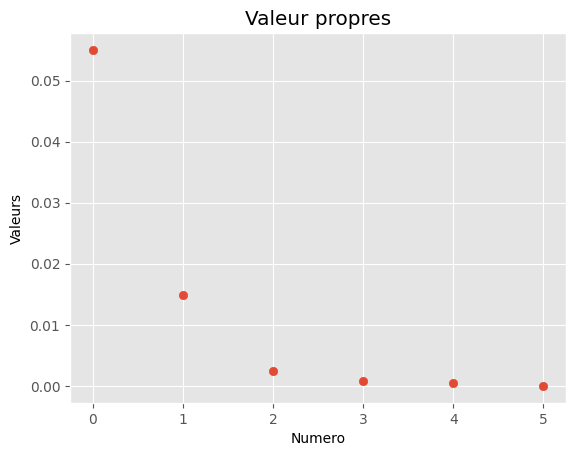


Inertie

0.07363682484894489
-------------[ Valeurs, Inertie, Cumul ]--------------

[[ 5.50125256e-02  7.47079002e-01  7.47079002e-01]
 [ 1.49081227e-02  2.02454719e-01  9.49533721e-01]
 [ 2.39492448e-03  3.25234621e-02  9.82057183e-01]
 [ 7.79489822e-04  1.05855979e-02  9.92642781e-01]
 [ 5.41762253e-04  7.35721908e-03  1.00000000e+00]
 [-2.49834881e-18 -3.39279812e-17  1.00000000e+00]]



In [148]:
# Calcule des valeurs propres
eig_val,eig_vect = np.linalg.eig(inertie)

# Ordonnée les valeurs propres
index = np.argsort(eig_val)[::-1]
eig_val = eig_val[index]
eig_vect = eig_vect[:,index]

print('\nValeur propres\n')
print(eig_val)


plt.scatter([x for x in range(len(eig_val))],eig_val)
plt.title('Valeur propres')
plt.xlabel("Numero")
plt.ylabel('Valeurs')
plt.show()


# Calcule de l'inertie (trace de la matrice)
inertie = np.diag(inertie).sum() # trace de la matrice

print("\nInertie\n")
print(inertie)

# Calcule du taux d'inertie
taux_inertie = eig_val/inertie

# Calcule taux d'inertie cumulé (100%)
cumul_taux_inertie = np.cumsum(taux_inertie)

table_info = np.hstack(
    (np.hstack((eig_val.reshape(-1,1),taux_inertie.reshape(-1,1))),cumul_taux_inertie.reshape(-1,1))
)

show_matrix(table_info,"[ Valeurs, Inertie, Cumul ]")

# Question 4

- ACP ligne/colonne

In [149]:
# Axe principaux ACP 
axe_princ = transforme_centre.dot(eig_vect)
print("Axe principaux")
print(axe_princ)

# Axe principaux ACP colonne (Formule de transition)
C_principaux = np.sqrt(eig_val)*eig_vect

print("\nFacteurs colonne\n")
print(C_principaux)


Axe principaux
[[-1.23568141e-01  6.84471241e-02 -7.02448164e-02 -5.90586270e-02
   9.42833261e-03 -1.91636974e-16]
 [ 1.02813622e-01 -8.70612531e-02 -6.43140651e-02  2.79623444e-02
  -3.19187664e-02  2.06439568e-17]
 [-4.78227585e-01  5.22259773e-02 -2.20105923e-02  3.24144504e-02
  -5.26606090e-04  1.32399305e-16]
 [-2.55187177e-01  3.22608796e-02  4.72735796e-02  7.61980485e-03
   2.38164113e-03  9.80768278e-17]
 [ 2.61524863e-01 -8.94821451e-02 -1.66490855e-02  1.73224837e-03
   1.34294492e-02  1.97549657e-16]
 [-2.37588353e-02 -1.57131602e-01  4.22982013e-02 -4.16276323e-05
   3.03410565e-02  1.33992890e-16]
 [ 2.36683747e-01  2.06058835e-01  2.84875447e-02  8.92586572e-03
   4.03668244e-04  2.67615113e-16]
 [-3.71678273e-02 -1.09849004e-01  9.76737095e-02 -4.97713685e-02
  -6.62164270e-02 -4.33101799e-16]]

Facteurs colonne

[[-0.13716583 -0.07820396 -0.00860404 -0.00382153 -0.00307282         nan]
 [-0.06954829  0.02253072  0.00770183  0.0174223   0.01396313         nan]
 [-0.06

C:\Users\LEGION\AppData\Local\Temp\ipykernel_1820\1730784942.py:7: RuntimeWarning: invalid value encountered in sqrt
  C_principaux = np.sqrt(eig_val)*eig_vect


- Facteurs lignes

In [150]:
PHI1 = axe_princ[:,0]
PHI2 = axe_princ[:,1]

PHI_plan = np.vstack((PHI1,PHI2)).T

print("\nPlan principal\n")
print(PHI_plan)


Plan principal

[[-0.12356814  0.06844712]
 [ 0.10281362 -0.08706125]
 [-0.47822759  0.05222598]
 [-0.25518718  0.03226088]
 [ 0.26152486 -0.08948215]
 [-0.02375884 -0.1571316 ]
 [ 0.23668375  0.20605883]
 [-0.03716783 -0.109849  ]]


# Question 6

- Contribution relative (qualité de reprensetation)

In [151]:
def quality_reprensentation(C,Z):
    return np.sum(C**2)/np.sqrt(np.sum(Z**2))**2


def get_contribution_relative(axes):
    # Contribution relative de chaque ligne sur chaque axe
    all_contribution_relative = []
    # Pour chaque individus
    for ind in range(axes.shape[0]):
        contribution_relative = []
        # Pour chaque axe
        for axe in range(axes.shape[1]):
            # Calculer la qualité de representation
            quality_all_axes = quality_reprensentation(axes[ind,axe],transforme_centre[ind])
            contribution_relative.append(quality_all_axes)
        all_contribution_relative.append(np.array(contribution_relative))

    all_contribution_relative = np.array(all_contribution_relative)
    return all_contribution_relative

all_contribution_relative = get_contribution_relative(axe_princ)


print("\nContribution relative\n")
print(all_contribution_relative)



Contribution relative

[[5.36411553e-01 1.64586993e-01 1.73345936e-01 1.22532641e-01
  3.12287708e-03 1.29016040e-30]
 [4.38847029e-01 3.14674585e-01 1.71721140e-01 3.24607837e-02
  4.22964617e-02 1.76928471e-32]
 [9.81701115e-01 1.17080128e-02 2.07956976e-03 4.51011236e-03
  1.19036950e-06 7.52456589e-32]
 [9.51222614e-01 1.52025654e-02 3.26438557e-02 8.48109971e-04
  8.28546939e-05 1.40506784e-31]
 [8.89834985e-01 1.04173267e-01 3.60632013e-03 3.90394627e-05
  2.34638844e-03 5.07733791e-31]
 [2.01856430e-02 8.82915960e-01 6.39788001e-02 6.19663209e-08
  3.29195348e-02 6.42030708e-31]
 [5.63738929e-01 4.27290889e-01 8.16678634e-03 8.01755324e-04
  1.63979790e-06 7.20713115e-31]
 [4.62793206e-02 4.04245200e-01 3.19600896e-01 8.29873294e-02
  1.46887254e-01 6.28394825e-30]]


- Contribution absolue (contribution sur axe)

In [152]:
def contribution(C,axe):
    weight = 1/transforme_centre.shape[0]
    return (weight*C**2)/eig_val[axe]

def contribution_absolue(axes):
    # Contribution relative de chaque ligne sur chaque axe
    all_contribution_absolue = []
    # Pour chaque individus
    for ind in range(axes.shape[0]):
        contribution_absolue = []
        # Pour chaque axe
        for axe in range(axes.shape[1]):
            # Calculer la contribution
            individu_contribution = contribution(axes[ind,axe],axe)
            contribution_absolue.append(individu_contribution)
            
        all_contribution_absolue.append(np.array(contribution_absolue))

    all_contribution_absolue = np.array(all_contribution_absolue)
    return all_contribution_absolue

all_contribution_absolue = contribution_absolue(axe_princ)

print("Contribution absolue")
print(all_contribution_absolue)

Contribution absolue
[[ 3.46945654e-02  3.92823504e-02  2.57541223e-01  5.59327609e-01
   2.05102550e-02 -1.83745008e-15]
 [ 2.40187140e-02  6.35531209e-02  2.15888800e-01  1.25385329e-01
   2.35067976e-01 -2.13227307e-17]
 [ 5.19658071e-01  2.28696862e-02  2.52860881e-02  1.68491070e-01
   6.39842413e-05 -8.77058078e-16]
 [ 1.47967428e-01  8.72648738e-03  1.16642056e-01  9.31080566e-03
   1.30874163e-03 -4.81271075e-16]
 [ 1.55408367e-01  6.71366750e-02  1.44676821e-02  4.81193649e-04
   4.16119120e-02 -1.95258298e-15]
 [ 1.28262212e-03  2.07020871e-01  9.33817458e-02  2.77883643e-07
   2.12403989e-01 -8.98298035e-16]
 [ 1.27287367e-01  3.56016014e-01  4.23572962e-02  1.27761577e-02
   3.75967619e-05 -3.58325909e-15]
 [ 3.13893830e-03  1.01176418e-01  4.97936031e-01  3.97245264e-01
   1.01165575e+00 -9.38505701e-15]]


# Question 7

In [153]:
# (ACP colonne, avec formule de transition)

C1 = C_principaux[:,0]
C2 = C_principaux[:,1]

C_plan = np.vstack((C1,C2)).T
print('Plan principal')
print(C_plan)

Plan principal
[[-0.13716583 -0.07820396]
 [-0.06954829  0.02253072]
 [-0.06002906  0.06099373]
 [ 0.02215999  0.04945389]
 [ 0.09535325 -0.00437548]
 [ 0.1348121  -0.04582098]]


# Question 8

In [154]:
all_contribution_relative_colonne = get_contribution_relative(C_principaux)
all_contribution_absolue_colonne = contribution_absolue(C_principaux)

print("\nContribution relative colonne\n")
print(all_contribution_relative_colonne)


print("\nContribution absolue colonne\n")
print(all_contribution_absolue_colonne)




Contribution relative colonne

[[6.60962747e-01 2.14853556e-01 2.60069526e-03 5.13049432e-04
  3.31710090e-04            nan]
 [2.00809712e-01 2.10747369e-02 2.46263000e-03 1.26015146e-02
  8.09427034e-03            nan]
 [1.54679617e-02 1.59691009e-02 2.46886119e-03 3.87589448e-05
  6.19748914e-04            nan]
 [7.17304405e-03 3.57244433e-02 9.64586727e-03 2.68636563e-03
  7.87148762e-04            nan]
 [1.18291759e-01 2.49077586e-04 5.46461951e-03 3.16212657e-03
  1.47692201e-03            nan]
 [6.49905206e-01 7.50794493e-02 2.16717090e-02 9.06924109e-04
  9.14117264e-04            nan]]

Contribution absolue colonne

[[0.04275041 0.05127958 0.00386387 0.00234193 0.00217859        nan]
 [0.0109906  0.00425635 0.00309603 0.04867551 0.04498494        nan]
 [0.00818788 0.03119302 0.03001959 0.00144798 0.03331248        nan]
 [0.0011158  0.02050634 0.03446633 0.02949173 0.01243351        nan]
 [0.02065948 0.00016052 0.02192273 0.03897582 0.0261924         nan]
 [0.04129583 0.017604

# Question 9

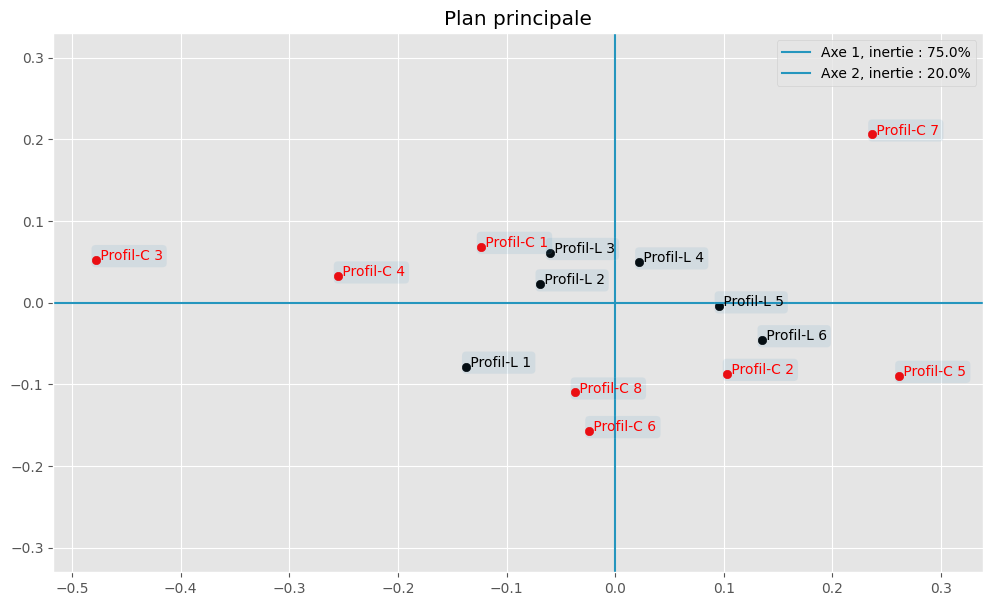

In [155]:
plt.figure(figsize=(12,7))

plt.scatter(C1,C2, color='black')
for i in range(C_plan.shape[0]):
    plt.annotate(f' Profil-L {i+1}',(C1[i],C2[i]),bbox=dict(boxstyle="round", alpha=0.1),c='black')

plt.scatter(PHI1,PHI2, color='r')
for i in range(PHI_plan.shape[0]):
    plt.annotate(f' Profil-C {i+1}',(PHI1[i],PHI2[i]),bbox=dict(boxstyle="round", alpha=0.1),c='red')

plt.axline((0,0),(.3,0),c='#2596BE',label=f'Axe 1, inertie : {round(table_info[0,1],2)*100}%')
plt.axline((0,0.3),(0,-.3),c='#2596BE',label=f'Axe 2, inertie : {round(table_info[1,1],2)*100}%')

plt.title("Plan principale")
plt.legend()